# Scikit Learn Intro

In [87]:
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [9]:
import sklearn as sk
print(sk.__version__)

1.2.2


In [8]:
# %pip install --upgrade scikit-learn==0.23.0

In [33]:
# from sklearn.datasets import load_boston

In [27]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [14]:
raw_df.shape

(1012, 11)

In [15]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [35]:
X = data # properties of house prices
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [34]:
y = target # prices of houses
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Load model

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
mod = KNeighborsRegressor().fit(X, y)

In [67]:
pred = mod.predict(X)

### use another model to predict same thing

In [52]:
# from sklearn.linear_model import LinearRegression

In [51]:
# mod = LinearRegression()

In [50]:
# mod.fit(X,y)

In [49]:
# mod.predict(X)

### make scaterr plot to see how well the model is doing

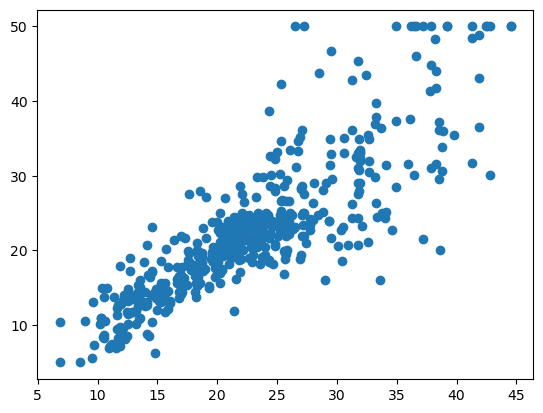

In [68]:
plt.scatter(pred, y)

## Create pipelines

In [91]:
mod = KNeighborsRegressor().fit(X,y)

pipe = Pipeline([
    ("scale", StandardScaler()),           # Create pipeline to improve data accuracy
    ("model", KNeighborsRegressor(n_neighbors=1))
]) 
# pipe.get_params()

In [84]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [85]:
pred = pipe.predict(X)

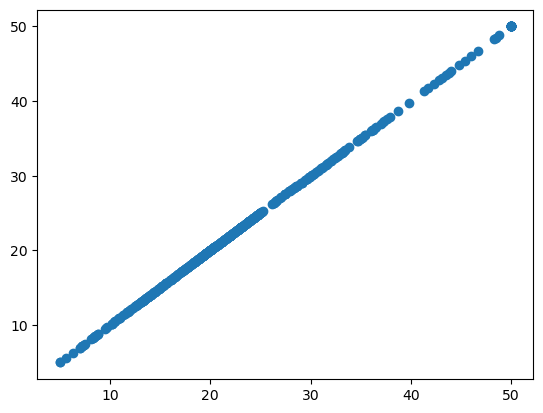

In [86]:
plt.scatter(pred, y)

## Do cross validation using grid search

In [92]:
mod = GridSearchCV(estimator=pipe,
            param_grid={'model__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
            cv=3)

In [94]:
mod.fit(X, y);
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003362,1.021342e-03,0.003743,0.000592,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.002664,4.700779e-04,0.002928,0.000732,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.002336,4.703608e-04,0.002894,0.001267,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001999,3.371748e-07,0.002466,0.000367,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002589,8.338333e-04,0.002332,0.000471,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.005735,3.250721e-03,0.002312,0.001784,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001665,1.246343e-03,0.002903,0.002235,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.005528,2.178689e-03,0.002002,0.000810,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.002835,8.336503e-04,0.003907,0.000706,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.003386,8.842493e-04,0.003510,0.000407,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
